# Prepare the data

In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
(train_images1, train_labels1), (test_images, test_labels_number) = \
tf.keras.datasets.mnist.load_data()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
print('train images     :', train_images1.shape,
      'labels:'           , train_labels1.shape)
print('test images      :', test_images.shape,
      'labels:'           , test_labels_number.shape)

train images     : (60000, 28, 28) labels: (60000,)
test images      : (10000, 28, 28) labels: (10000,)


In [3]:
validation_images2= train_images1[55000:60000,]
validation_labels2=train_labels1[55000:60000,]
train_images2=train_images1[0:55000,]
train_labels2=train_labels1[0:55000,]
test_images2=test_images
test_labels2=test_labels_number

In [4]:
#reshape the data x_train
RESHAPED=784
train_images=train_images2.reshape(55000,RESHAPED)
validation_images=validation_images2.reshape(5000, RESHAPED)
test_images=test_images2.reshape(10000,RESHAPED)

In [5]:
#reshape the data y_train
from tensorflow.keras.utils import to_categorical
train_labels1[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [6]:
NB_CLASSES=10
train_labels=to_categorical(train_labels2 ,NB_CLASSES)
validation_labels=to_categorical(validation_labels2 ,NB_CLASSES)
test_labels=to_categorical(test_labels2 ,NB_CLASSES)
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

# Model Construction  

In [7]:
def layer(output_dim,input_dim,inputs, activation=None):
    W = tf.Variable(tf.random_normal([input_dim, output_dim]))
    b = tf.Variable(tf.random_normal([1, output_dim]))
    XWb = tf.matmul(inputs, W) + b
    if activation is None:
        outputs = XWb
    else:
        outputs = activation(XWb)
    return outputs

In [8]:
x = tf.placeholder("float", [None, 784])

In [9]:
h1=layer(output_dim=256,input_dim=784,
         inputs=x ,activation=tf.nn.relu)  


In [10]:
y_predict=layer(output_dim=10,input_dim=256,
                    inputs=h1,activation=None)


# Define training

In [11]:
y_label = tf.placeholder("float", [None, 10])

In [ ]:
#loss function

In [12]:
loss_function = tf.reduce_mean(
                  tf.nn.softmax_cross_entropy_with_logits
                         (logits=y_predict , 
                          labels=y_label))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [ ]:
#optimizer

In [13]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001) \
                    .minimize(loss_function)

# Define accuracy

In [ ]:
#define correct prediction

In [14]:
correct_prediction = tf.equal(tf.argmax(y_label  , 1),
                              tf.argmax(y_predict, 1))

In [ ]:
#mean accuracy

In [15]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

# Start training

In [16]:
trainEpochs = 15
batchSize = 100
totalBatchs = int(len(train_images)/batchSize)
epoch_list=[];loss_list=[];accuracy_list=[]
from time import time
startTime=time()
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [20]:
import numpy as np
epochs_completed = 0
index_in_epoch = 0
num_examples = train_images.shape[0]
    # for splitting out batches of data
def next_batch(batch_size):

    global train_images
    global train_labels
    global index_in_epoch
    global epochs_completed

    start = index_in_epoch
    index_in_epoch += batch_size

    # when all trainig data have been already used, it is reorder randomly    
    if index_in_epoch > num_examples:
        # finished epoch
        epochs_completed += 1
        # shuffle the data
        perm = np.arange(num_examples)
        np.random.shuffle(perm)
        train_images = train_images[perm]
        train_labels= train_labels[perm]
        # start next epoch
        start = 0
        index_in_epoch = batch_size
        assert batch_size <= num_examples
    end = index_in_epoch
    return train_images[start:end], train_labels[start:end]

In [21]:
for epoch in range(trainEpochs):
    for i in range(totalBatchs):
        batch_x, batch_y = next_batch(batchSize)
        sess.run(optimizer,feed_dict={x: batch_x,y_label: batch_y})
        
    loss,acc = sess.run([loss_function,accuracy],
                        feed_dict={x: validation_images, 
                                   y_label: validation_labels})

    epoch_list.append(epoch);loss_list.append(loss)
    accuracy_list.append(acc)    
    print("Train Epoch:", '%02d' % (epoch+1), "Loss=", \
                "{:.9f}".format(loss)," Accuracy=",acc)
    
duration =time()-startTime
print("Train Finished takes:",duration)      

Train Epoch: 01 Loss= 1006.154785156  Accuracy= 0.9002
Train Epoch: 02 Loss= 763.721435547  Accuracy= 0.913
Train Epoch: 03 Loss= 635.867370605  Accuracy= 0.9218
Train Epoch: 04 Loss= 547.079528809  Accuracy= 0.9278
Train Epoch: 05 Loss= 482.903808594  Accuracy= 0.9348
Train Epoch: 06 Loss= 448.271697998  Accuracy= 0.9354
Train Epoch: 07 Loss= 431.238891602  Accuracy= 0.9396
Train Epoch: 08 Loss= 386.299316406  Accuracy= 0.9428
Train Epoch: 09 Loss= 368.051086426  Accuracy= 0.945
Train Epoch: 10 Loss= 354.249053955  Accuracy= 0.9466
Train Epoch: 11 Loss= 352.526458740  Accuracy= 0.9444
Train Epoch: 12 Loss= 327.808319092  Accuracy= 0.9498
Train Epoch: 13 Loss= 329.735504150  Accuracy= 0.9468
Train Epoch: 14 Loss= 312.213836670  Accuracy= 0.9518
Train Epoch: 15 Loss= 304.194885254  Accuracy= 0.951
Train Finished takes: 341.9517734050751


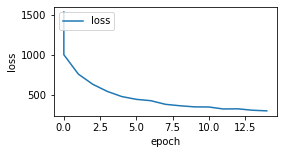

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.plot(epoch_list, loss_list, label = 'loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left')

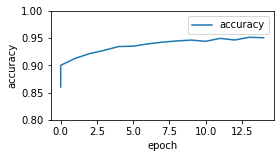

In [23]:
plt.plot(epoch_list, accuracy_list,label="accuracy" )
fig = plt.gcf()
fig.set_size_inches(4,2)
plt.ylim(0.8,1)
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Accuracy calculation

In [24]:
print("Accuracy:", sess.run(accuracy,
                           feed_dict={x: test_images,
                                      y_label: test_labels}))

Accuracy: 0.9434


# Prediction

In [25]:
prediction_result=sess.run(tf.argmax(y_predict,1),
                           feed_dict={x: test_images })

In [26]:
prediction_result[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=int64)

In [28]:
import matplotlib.pyplot as plt
import numpy as np
def plot_images_labels_prediction(images,labels,
                                  prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        
        ax.imshow(np.reshape(images[idx],(28, 28)), 
                  cmap='binary')
            
        title= "label=" +str(np.argmax(labels[idx]))
        if len(prediction)>0:
            title+=",predict="+str(prediction[idx]) 
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

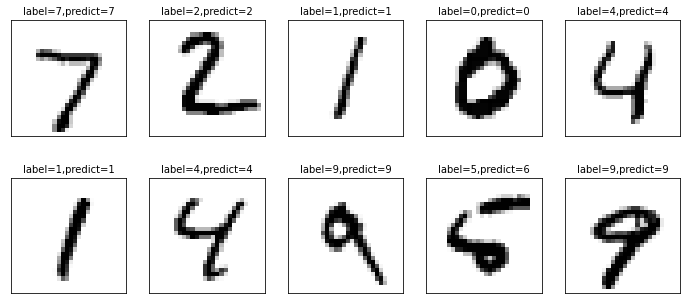

In [29]:
plot_images_labels_prediction(test_images,
                             test_labels,
                              prediction_result,0)

In [33]:
y_predict_Onehot=sess.run(y_predict,
                          feed_dict={x: test_images })

In [31]:
y_predict_Onehot[8]

array([ -7615.7583,  -8678.605 ,  23601.871 ,   3508.316 ,  18469.291 ,
        29040.266 ,  43402.15  , -16924.182 ,  15311.58  ,   4114.389 ],
      dtype=float32)

# Find error predictions

In [32]:
for i in range(400):
    if prediction_result[i]!=np.argmax(test_labels[i]):
        print("i="+str(i)+
              "   label=",np.argmax(test_labels[i]),
              "predict=",prediction_result[i])

i=8   label= 5 predict= 6
i=61   label= 8 predict= 2
i=63   label= 3 predict= 2
i=84   label= 8 predict= 5
i=119   label= 2 predict= 8
i=126   label= 0 predict= 9
i=149   label= 2 predict= 8
i=211   label= 5 predict= 9
i=232   label= 8 predict= 6
i=241   label= 9 predict= 3
i=247   label= 4 predict= 6
i=282   label= 7 predict= 3
i=298   label= 2 predict= 8
i=321   label= 2 predict= 7
i=341   label= 6 predict= 7
i=381   label= 3 predict= 7


In [ ]:
#sess.close()